In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Image filenames - ALL 21 plots (0 to 20)
image_files = [
    "mousecys_0_barplot.png",
    "mousecys_1_barplot.png",
] + [f"mousesec_{i}_barplot.png" for i in range(2, 21)]

print(f"Total files: {len(image_files)}")

# Split into groups of 4 plots each (5 figures total: 4+4+4+4+5)
plots_per_figure = 4
num_figures = (len(image_files) + plots_per_figure - 1) // plots_per_figure

for fig_num in range(num_figures):
    start_idx = fig_num * plots_per_figure
    end_idx = min(start_idx + plots_per_figure, len(image_files))
    current_files = image_files[start_idx:end_idx]
    
    num_plots = len(current_files)
    
    # Create 2x2 grid for 4 plots, or adjust for last figure
    if num_plots <= 2:
        rows, cols = 1, num_plots
        figsize = (16, 10)
    elif num_plots <= 4:
        rows, cols = 2, 2
        figsize = (18, 18)
    else:
        rows, cols = 2, 3
        figsize = (24, 16)
    
    fig, axs = plt.subplots(rows, cols, figsize=figsize, dpi=100)
    if num_plots == 1:
        axs = [axs]
    else:
        axs = axs.flatten()
    
    for i, file in enumerate(current_files):
        try:
            img = Image.open(file)
            axs[i].imshow(img)
            axs[i].axis('off')
            title = os.path.splitext(os.path.basename(file))[0]
            axs[i].set_title(title, fontsize=18, pad=10, fontweight='bold')
        except Exception as e:
            print(f"Error loading {file}: {e}")
            axs[i].axis('off')
    
    # Hide unused subplots
    for i in range(num_plots, len(axs)):
        axs[i].axis('off')
    
    plt.tight_layout(pad=2.0)
    output_file = f'combined_barplots_group_{fig_num + 1}.png'
    plt.savefig(output_file, dpi=100, bbox_inches='tight')
    plt.close()
    print(f"Saved {output_file} with {num_plots} plots")

print("Done! Created separate figures for better readability")

Total files: 21
Saved combined_barplots_group_1.png with 4 plots
Saved combined_barplots_group_2.png with 4 plots
Saved combined_barplots_group_3.png with 4 plots
Saved combined_barplots_group_4.png with 4 plots
Saved combined_barplots_group_5.png with 4 plots
Saved combined_barplots_group_6.png with 1 plots
Done! Created separate figures for better readability


In [2]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Image filenames - ALL 20 plots (0 to 19)
image_files = [f"humansec_{i}_barplot.png" for i in range(0, 20)]

print(f"Total files: {len(image_files)}")

# Split into groups of 4 plots each (5 figures total: 4+4+4+4+4)
plots_per_figure = 4
num_figures = (len(image_files) + plots_per_figure - 1) // plots_per_figure

for fig_num in range(num_figures):
    start_idx = fig_num * plots_per_figure
    end_idx = min(start_idx + plots_per_figure, len(image_files))
    current_files = image_files[start_idx:end_idx]
    
    num_plots = len(current_files)
    
    # Create 2x2 grid for 4 plots
    if num_plots <= 2:
        rows, cols = 1, num_plots
        figsize = (16, 10)
    elif num_plots <= 4:
        rows, cols = 2, 2
        figsize = (18, 18)
    else:
        rows, cols = 2, 3
        figsize = (24, 16)
    
    fig, axs = plt.subplots(rows, cols, figsize=figsize, dpi=100)
    if num_plots == 1:
        axs = [axs]
    else:
        axs = axs.flatten()
    
    for i, file in enumerate(current_files):
        try:
            img = Image.open(file)
            axs[i].imshow(img)
            axs[i].axis('off')
            title = os.path.splitext(os.path.basename(file))[0]
            axs[i].set_title(title, fontsize=18, pad=10, fontweight='bold')
        except Exception as e:
            print(f"Error loading {file}: {e}")
            axs[i].axis('off')
    
    # Hide unused subplots
    for i in range(num_plots, len(axs)):
        axs[i].axis('off')
    
    plt.tight_layout(pad=2.0)
    output_file = f'combined_human_barplots_group_{fig_num + 1}.png'
    plt.savefig(output_file, dpi=100, bbox_inches='tight')
    plt.close()
    print(f"Saved {output_file} with {num_plots} plots")

print("Done! Created separate figures for human plots")

Total files: 20
Saved combined_human_barplots_group_1.png with 4 plots
Saved combined_human_barplots_group_2.png with 4 plots
Saved combined_human_barplots_group_3.png with 4 plots
Saved combined_human_barplots_group_4.png with 4 plots
Saved combined_human_barplots_group_5.png with 4 plots
Done! Created separate figures for human plots


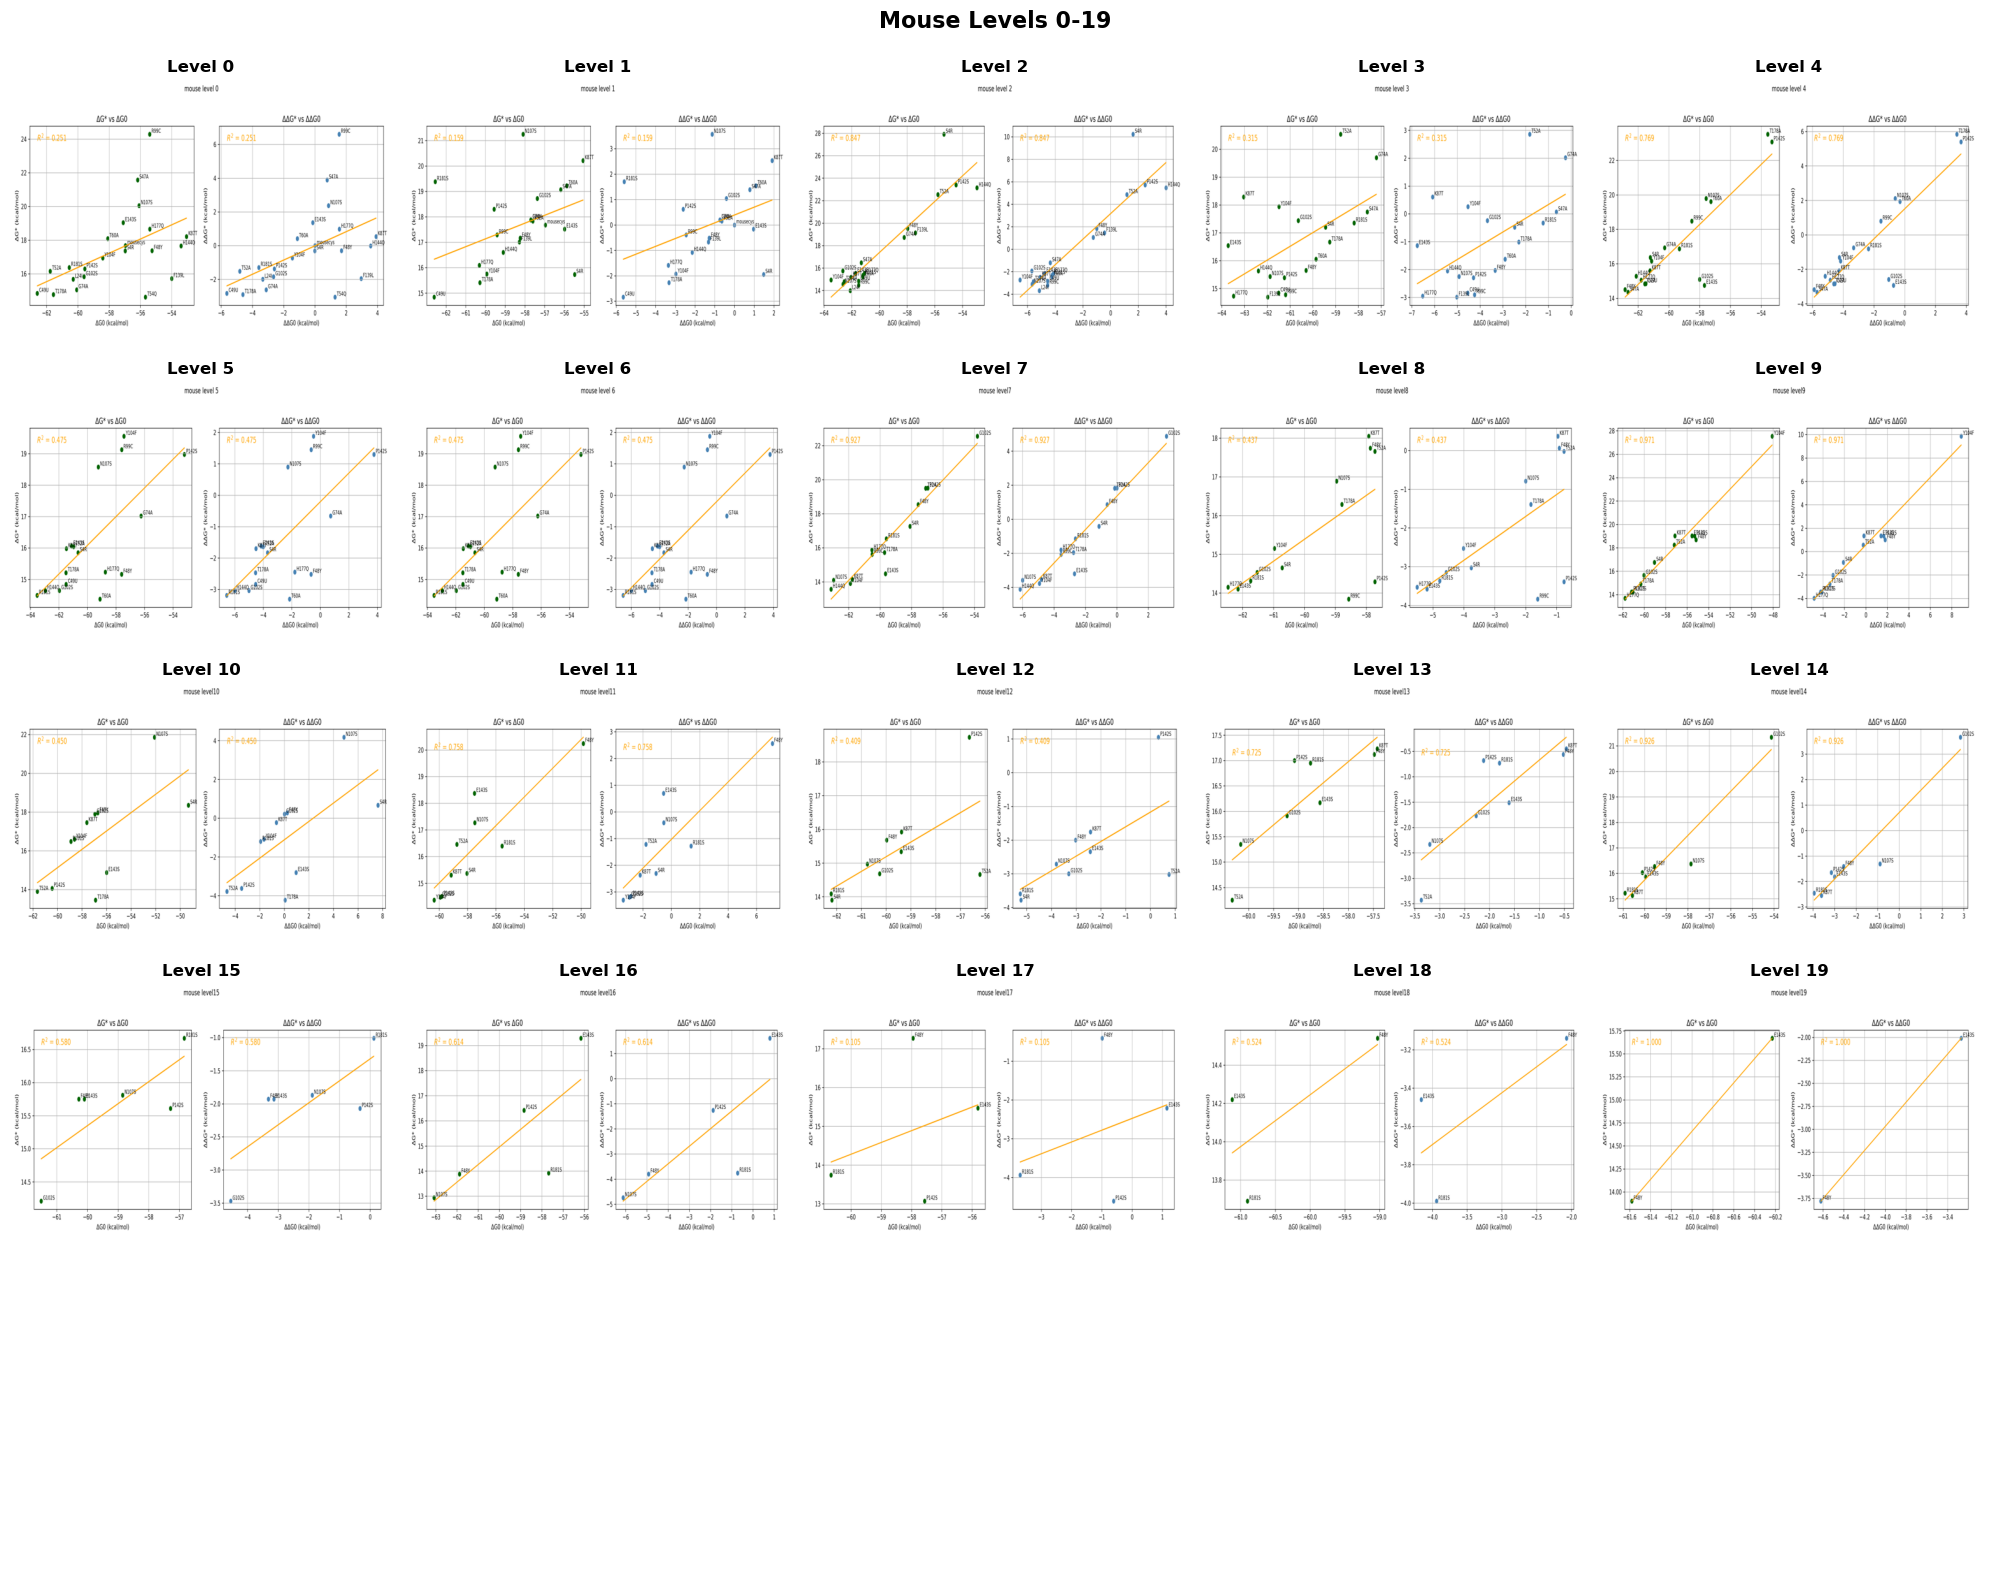

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Generate image filenames from level0mouse.png to level20mouse.png
image_files = [f"level{i}mouse.png" for i in range(20)]

# Create subplots - using 5x5 grid for 21 images (some cells will be empty)
fig, axs = plt.subplots(5, 5, figsize=(20, 16))
axs = axs.flatten()

for i in range(len(axs)):
    if i < len(image_files):
        try:
            # Check if file exists before trying to open
            if os.path.exists(image_files[i]):
                img = Image.open(image_files[i])
                # Resize image to reduce memory load and ensure consistent display
                img = img.resize((600, 400))
                axs[i].imshow(img)
                axs[i].axis('off')
                # Set title with level number
                axs[i].set_title(f"Level {i}", fontsize=12, fontweight='bold')
            else:
                # Handle missing files
                axs[i].text(0.5, 0.5, f'File not found:\n{image_files[i]}', 
                           ha='center', va='center', fontsize=10)
                axs[i].set_xlim(0, 1)
                axs[i].set_ylim(0, 1)
                axs[i].axis('off')
        except Exception as e:
            # Handle any other errors
            axs[i].text(0.5, 0.5, f'Error loading:\n{image_files[i]}\n{str(e)}', 
                       ha='center', va='center', fontsize=8)
            axs[i].set_xlim(0, 1)
            axs[i].set_ylim(0, 1)
            axs[i].axis('off')
    else:
        # Hide empty subplots
        axs[i].axis('off')

# Adjust layout and add main title
plt.suptitle('Mouse Levels 0-19', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Make room for main title
plt.show()

# Optional: Save the combined plot
# plt.savefig('mouse_levels_combined.png', dpi=300, bbox_inches='tight')